In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

### Import the Dataset 
The dataset is in CSV format; hence we use the read_csv function from Pandas.
Immediately after importing, take a quick look at the data using the head function.

In [2]:
sflowdata = pd.read_csv('test_SFLow_data.csv.csv', header=None)
sflowdata.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


#### Changing Header value in Dataset

In [3]:
sflowdata.columns = ['Type',
                      'sflow_agent_address',
                      'inputPort',
                      'outputPort',
                      'src_MAC',
                      'dst_MAC',
                      'ethernet_type',
                      'in_vlan',
                      'out_vlan',
                      'src_IP',
                      'dst_IP',
                      'IP_protocol',
                      'ip_tos',
                      'ip_ttl',
                      'udp_src_port/tcp_src_port/icmp_type',
                      'udp_dst_port/tcp_dst_port/icmp_code',
                      'tcp_flags',
                      'packet_size',
                      'IP_size',
                      'sampling_rate',
                      'null']
sflowdata.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate,null
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


In [4]:
sflowdata = sflowdata.set_index("Type").drop("CNTR", axis=0).reset_index()
sflowdata.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate,null
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


In [5]:
print(sflowdata.dtypes)

Type                                    object
sflow_agent_address                     object
inputPort                                int64
outputPort                               int64
src_MAC                                 object
dst_MAC                                 object
ethernet_type                           object
in_vlan                                float64
out_vlan                                 int64
src_IP                                  object
dst_IP                                  object
IP_protocol                              int64
ip_tos                                  object
ip_ttl                                   int64
udp_src_port/tcp_src_port/icmp_type    float64
udp_dst_port/tcp_dst_port/icmp_code      int64
tcp_flags                               object
packet_size                              int64
IP_size                                  int64
sampling_rate                            int64
null                                   float64
dtype: object

In [6]:
# Group by Top 5 Talkers(Senders)
top_talkers = pd.DataFrame(sflowdata['src_IP'].value_counts())
#top_talkers.plot(kind='bar',title="Top Talkers (Source IP Frequency)",figsize=(8,5))
top_talkers.columns = ['Total Packet Count']
top_talkers.head()

,Total Packet Count
152.3.219.19,126
207.241.228.157,66
130.14.250.13,63
193.62.192.8,46
192.122.131.36,40


In [7]:
# Group by Top 5 Listeners(Receivers)
top_listeners = pd.DataFrame(sflowdata['dst_IP'].value_counts())
#top_talkers.plot(kind='bar',title="Top Talkers (Source IP Frequency)",figsize=(8,5))
top_listeners.columns = ['Total Packet Count']
top_listeners.head()

,Total Packet Count
198.71.44.98,126
103.37.198.100,98
210.48.222.9,66
137.132.228.15,50
202.21.159.244,38


In [8]:
# Group by IP Protocol
ip_protocol = pd.DataFrame(sflowdata['IP_protocol'].value_counts())
#top_talkers.plot(kind='bar',title="Top Talkers (Source IP Frequency)",figsize=(8,5))
ip_protocol.columns = ['Total Packet Count']
#Get total sum of all packets 
Total = ip_protocol['Total Packet Count'].sum()
#Calculate percentage of TCP and UDP
TCPvalue = ip_protocol['Total Packet Count'].values[0]
UDPvalue = ip_protocol['Total Packet Count'].values[1]
TCPercent = (TCPvalue/Total) * 100
UDPercent = (UDPvalue/Total) * 100
print(Total)
print('TCP Percentage is' , TCPercent ,'%')
print('UDP Percentage is' , UDPercent ,'%')
ip_protocol

1171
TCP Percentage is 75.06404782237404 %
UDP Percentage is 11.955593509820666 %


,Total Packet Count
6,879
50,140
17,135
47,14
41,2
1,1


In [15]:
# Group by Top Applications protocol
dstip_port = pd.DataFrame(sflowdata['udp_dst_port/tcp_dst_port/icmp_code'].value_counts())
# top_talkers.plot(kind='bar',title="Top Talkers (Source IP Frequency)",figsize=(8,5))
dstip_port.columns = ['Total Packet Count']
dstip_port.head()

,Total Packet Count
443,234
56152,82
0,81
43930,45
80,37


In [10]:
# Total sum of packet size 
totalpsize = sflowdata['IP_size'].sum()
totalbefore = totalpsize/(1024*1024)/(15*60)
totaltraff = (totalpsize*2048)/(1024*1024)
totaltr = (totaltraff*8)/(15*60)

print('Total packet size:', totalpsize)
print('Total traffic(in MB):', totaltraff)
print('Average Traffic in Megabits/s:', totaltr )
print('Total traffic(in GB):', totaltraff/1024)
print(totalbefore)
#Caculate average traffic 


Total packet size: 1079883
Total traffic(in MB): 2109.146484375
Average Traffic in Megabits/s: 18.74796875
Total traffic(in GB): 2.059713363647461
0.001144285202026367


In [11]:
##OPTIONAL 
#Top 5 Communication pair 
top5cp = pd.DataFrame(sflowdata.groupby(['src_IP','dst_IP']).size())
top5cp = top5cp.iloc[:,0:1].reset_index().sort_values(0, ascending=False)
top5cp.columns = ['Source IP', 'Destination IP', 'Count']
top5cp.rename_axis('Index', inplace=True)
top5cp.head(n=5)

,Source IP,Destination IP,Count
Index,,,
117,152.3.219.19,198.71.44.98,126
262,207.241.228.157,210.48.222.9,66
46,130.14.250.13,103.37.198.100,63
213,193.62.192.8,137.132.228.15,46
45,130.14.250.11,103.37.198.100,35


In [12]:
#largest packet sent size based on IP
sent_nodes = sflowdata.groupby("src_IP")['IP_size'].sum()
sent_nodes.head()
sent_nodes.nlargest()
#source_addresses.plot(kind='barh',title="Addresses Sending Payloads",figsize=(8,5))

src_IP
152.3.219.19       188496
207.241.228.157     99000
130.14.250.13       94500
193.62.192.8        63963
192.122.131.36      53938
Name: IP_size, dtype: int64

(304, 2)


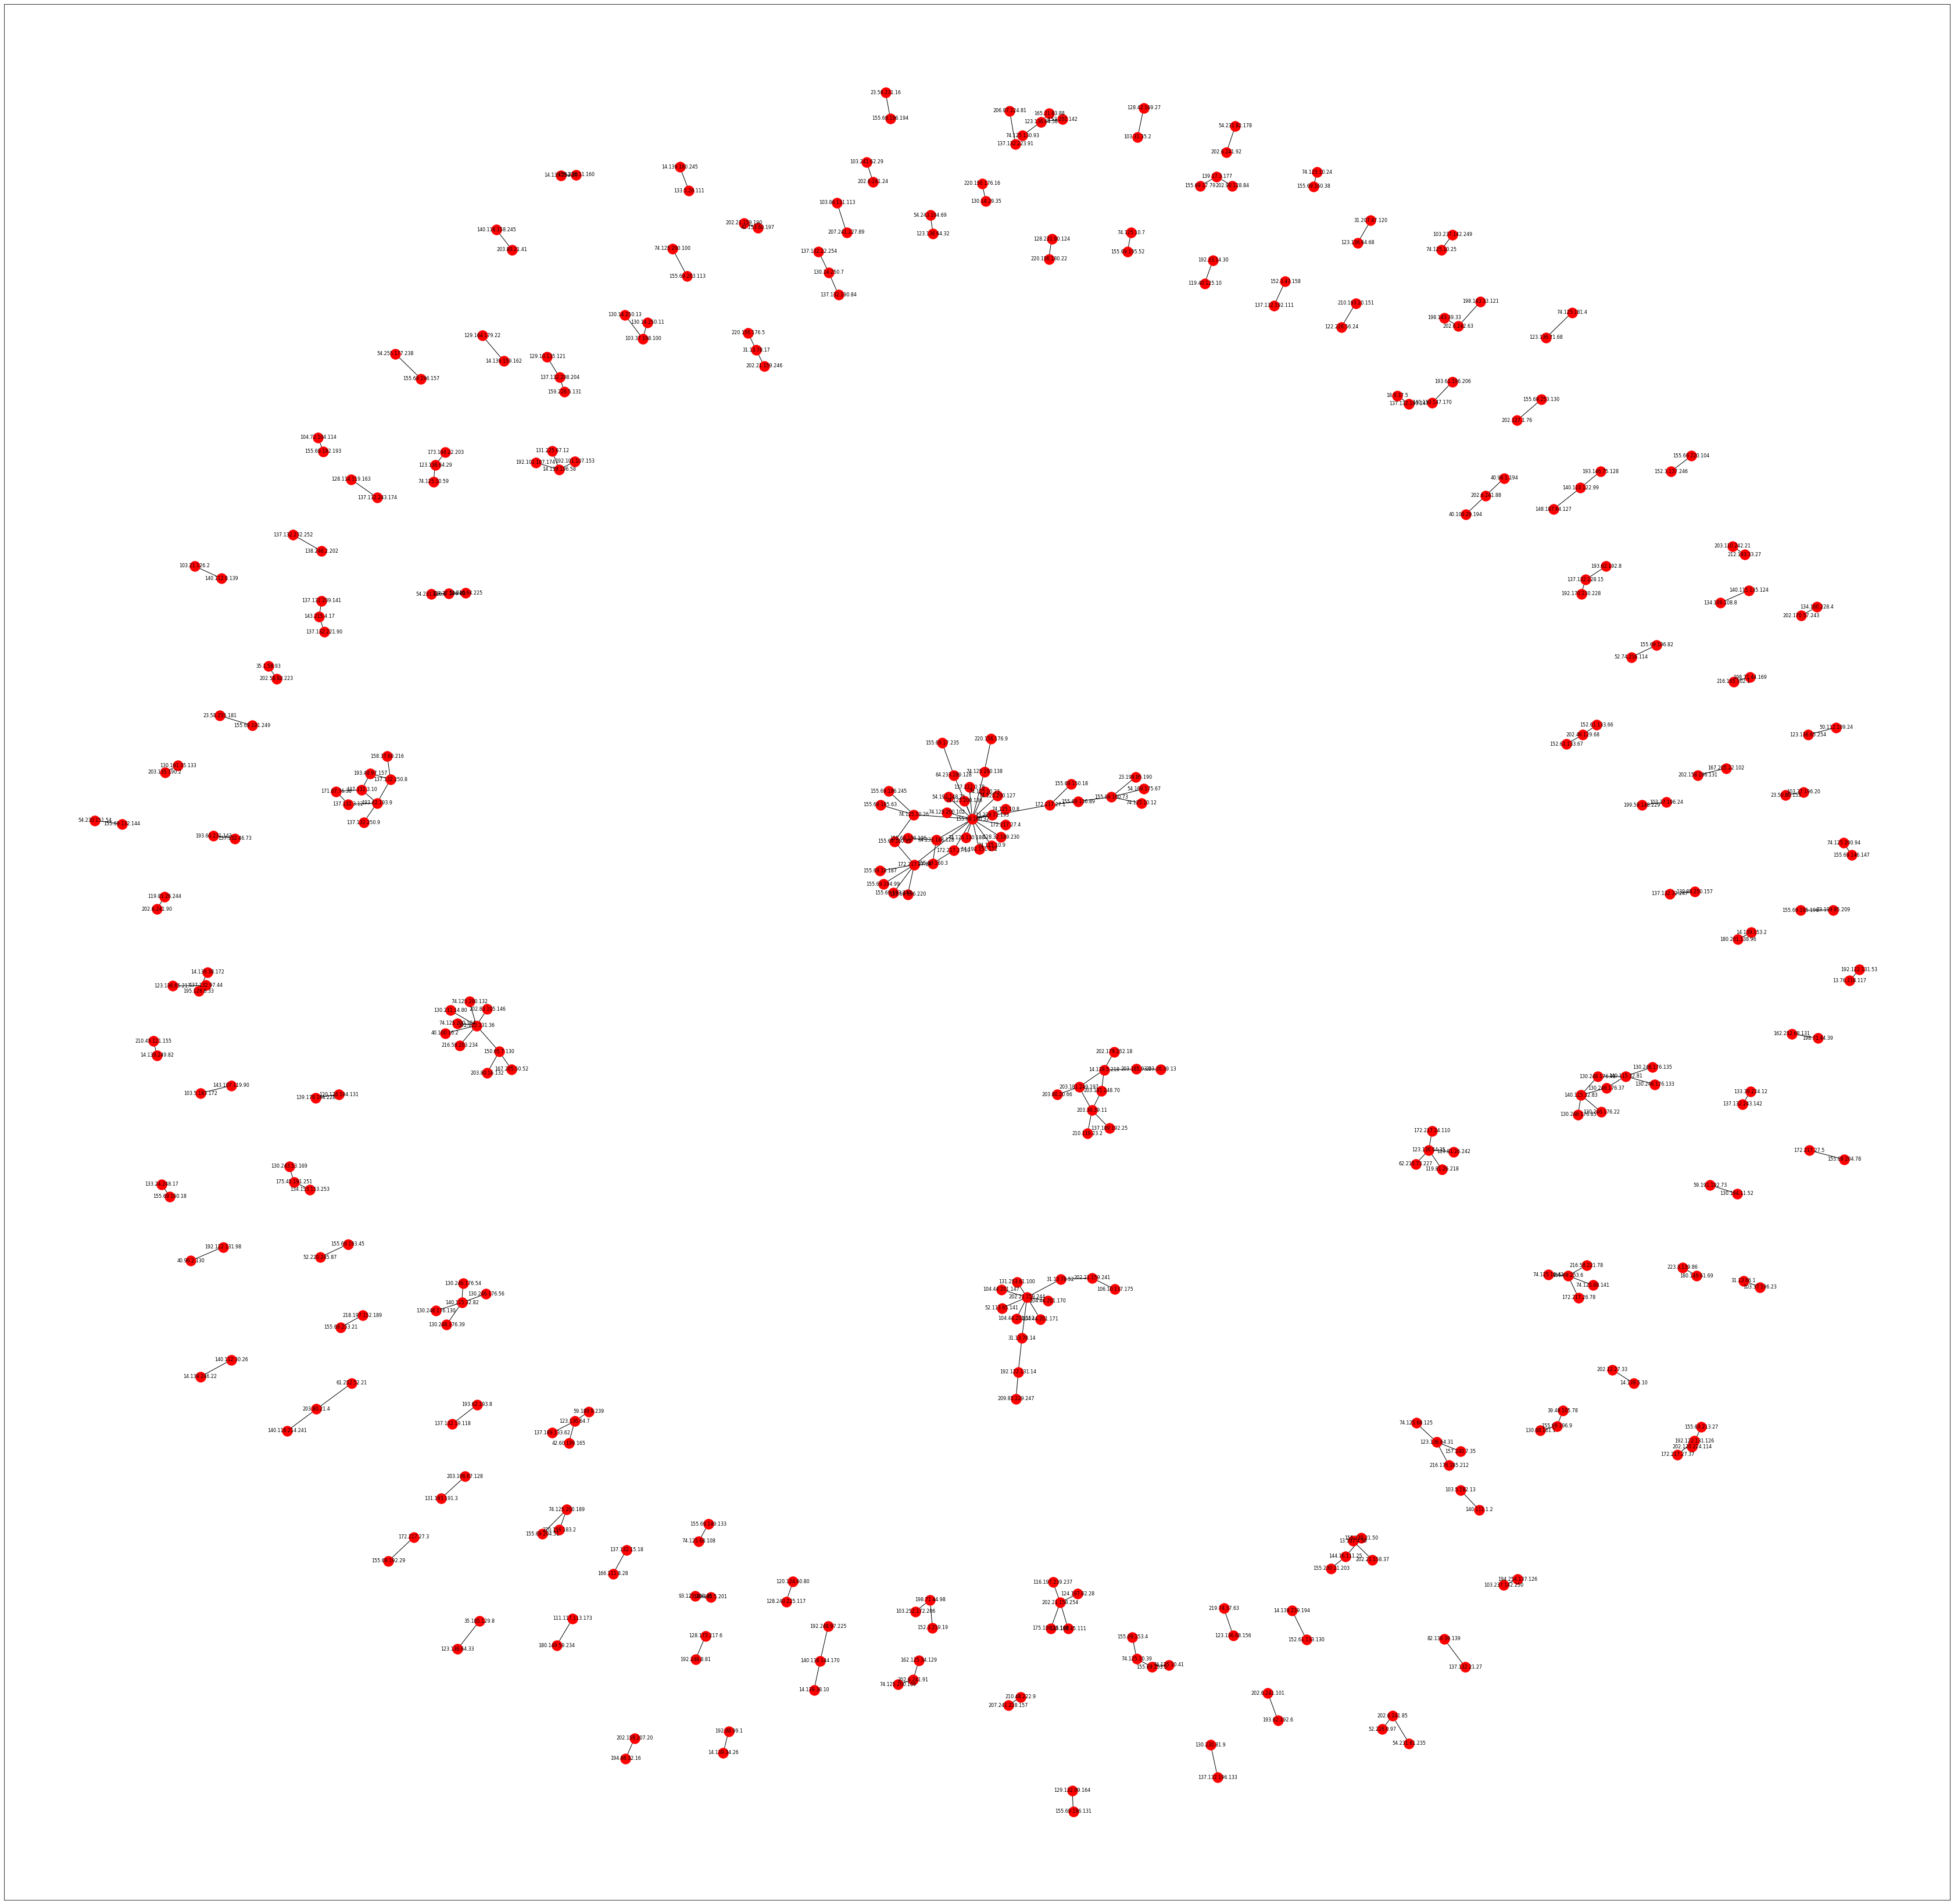

In [13]:
comm_dataset = pd.DataFrame({'from': top5cp['Source IP'], 'to' :top5cp['Destination IP']})
comm_dataset
print(comm_dataset.shape)
G = nx.from_pandas_edgelist(comm_dataset, 'from', 'to')

plt.figure(figsize=(60,60))
gp=nx.spring_layout(G)
nx.draw_networkx_nodes(G, gp, node_color='red')
nx.draw_networkx_edges(G,gp)
nx.draw_networkx_labels(G,gp,font_size=8)


plt.show()